[pyDSA](https://github.com/gabylaunay/pyDSA) is a python3 package for Drop Shape Analysis.

## Installing pyDSA

### Dependencies
You will first need to install [IMTreatment](https://framagit.org/gabylaunay/IMTreatment) by downloading the package [here](https://framagit.org/gabylaunay/IMTreatment/repository/master/archive.zip), extracting it and installing it with:
```bash
python3 setup.py install
```

pyDSA also use [OpenCV](https://opencv.org) for edge detection, so you will need it installed as well.

### Install pyDSA
Download the sources [here](https://github.com/gabylaunay/pyDSA/archive/master.zip), extract, and install them:

```bash
python3 setup.py install
```

pyDSA have some dependencies (matplotlib, scipy, numpy, ...) that should be installed automatically.



## Importing an image

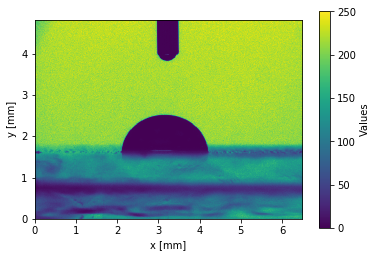

In [24]:
import pyDSA as dsa
import matplotlib.pyplot as plt

# Import an image
im = dsa.import_from_image('data/image.bmp', dx=1/120, dy=1/120, unit_x='mm', unit_y='mm')

# Display it
plt.figure()
im.display()
plt.show()

## Scaling
Here we scaled the image during the import (using the `dx` and `dy` parameters),
but you can also scale the image afterwards, using the `im.scale_interactive()` interactive function.

This function ask you to select two points on the image and to input the real distance (in mm for example) separating them.
It then scale the image accordingly.


## Focusing on the drop

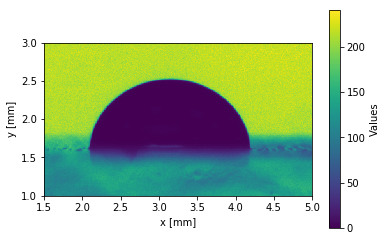

In [25]:
im.crop(intervx=[1.5, 5], intervy=[1, 3], inplace=True)

# Display
plt.figure()
im.display()
plt.show()

## Setting the baseline

pyDSA provides an interactive function `im.choose_baseline()` to interactively set the baseline.
It will display the drop image and ask you to put baseline points by clicking on the image.

Here, we are gonna use the non-interactive function `im.set_baseline()` to set the baseline.

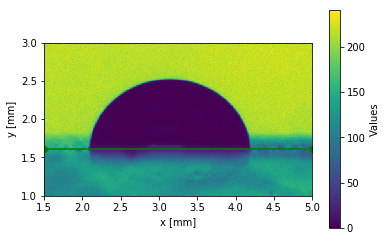

In [26]:
im.set_baseline(pt1=[2, 1.61], pt2=[4.5, 1.61])

# DisplayF
plt.figure()
im.display()
plt.show()

The baseline is automatically displayed as a green line on the drop image.

## Detecting the edges

The drop edge is detected using the [Canny edge detection](https://en.wikipedia.org/wiki/Canny_edge_detector) algorithm from OpenCV.

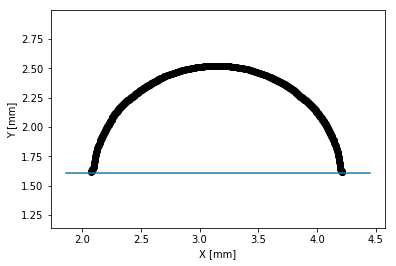

In [27]:
edge = im.edge_detection()

# Display the edge
plt.figure()
edge.display()
plt.show()

If the edge detection is not good enough, the `edge_detection` function provides several optional arguments that can help you get the edges you want.
Please refer to the inline documentation of this function if you want to know more about this.

## Fitting the edge

Computing the contact angles will necessitates the edges to be fitted by a curve of some kind. 
pyDSA uses a spline fitting to achieve this.

The parameter `s` can be tuned to adapt the fitting:
small values of `s` means a more accurate fitting, and bigger values of `s` a smoother fitting.

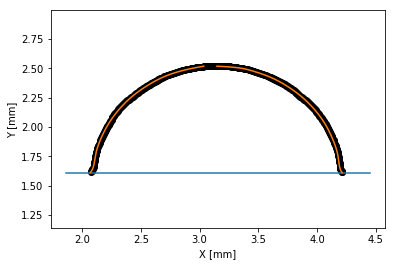

In [28]:
edge.fit(s=0.0005)

# Display the edge
plt.figure()
edge.display()
plt.show()

The edge fitting is displayed in orange.

## Detecting the triple points

In the case of a SLIPS surface, pyDSA can detect the triple points of contact between the oil, water and air (e.g. the ridge top).
This is done by detecting the point of inflexion of the edge line.

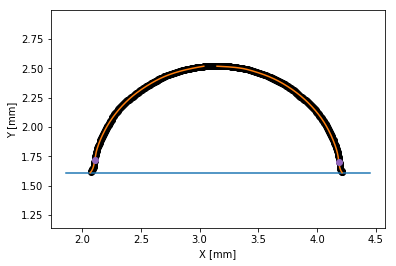

In [29]:
edge.detect_triple_points()

# Display the edge
plt.figure()
edge.display()
plt.show()

The triple points are displayed in purple.

## Computing the contact angles

pyDSA uses the edge fitting to compute two kind of contact angles:
- the contact angles between the drop and the baseline.
- the apparent contact angles at the triple point (if a triple point is present).

Contact angles: [48.90734602702736, 126.40314516490614]
Triple point angles: [81.4670191340014, 96.86878969719106]


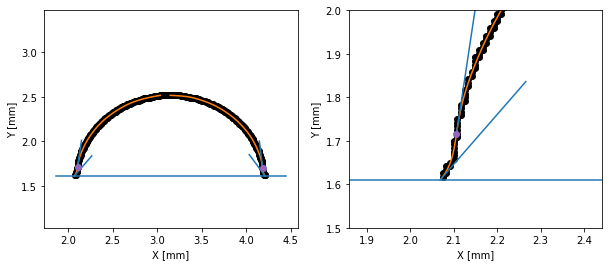

In [30]:
edge.compute_contact_angle()
print('Contact angles: {}'.format(edge.thetas))
print('Triple point angles: {}'.format(edge.thetas_triple))

# Display the edge
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.sca(axs[0])
edge.display()
plt.axis('equal')
plt.ylim(1.5, 3)
# Zoom
plt.sca(axs[1])
edge.display()
plt.axis('equal')
plt.ylim(1.5, 2)
plt.xlim(2, 2.3)
plt.show()

# Full script

The whole process can be concentrated in a few lines of code, that allow to get from the drop image to the contact angles:

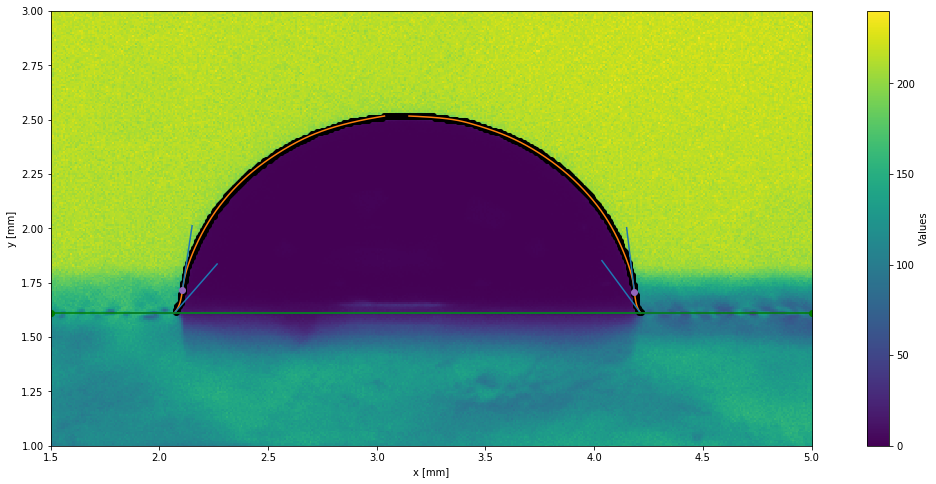

In [31]:
import pyDSA as dsa
import matplotlib.pyplot as plt

im = dsa.import_from_image('data/image.bmp', dx=1/120, dy=1/120, unit_x='mm', unit_y='mm')
im.crop(intervx=[1.5, 5], intervy=[1, 3], inplace=True)
im.set_baseline([2, 1.61], [4.5, 1.61])
edge = im.edge_detection()
edge.fit(s=0.0005)
edge.detect_triple_points()
edge.compute_contact_angle()

# Display the edge
plt.figure(figsize=(20, 8))
edge.display()
im.display()
plt.show()

# Dealing with videos

pyDSA can directly import videos and automatically analyze them in batch.
This is the subject of the next tutorial, available [here](../pydsa_video/index.html).


# How does it works ?

If you want to know more about how pyDSA works, you can take a look at the [drop shape analysis tutorial](../image-analysis/index.html), or go through the code (on your machine, or [here](https://github.com/gabylaunay/pyDSA)).